# Part II - Prosper Loan Data Exploratory Analysis Presentation
## by Victor Oguche


## Investigation Overview

This Exploratory and Explanatory analysis was carried out with the aim of finding trends, patterns and insight into the features that should be considered before issueing a loan based off the prosper loan dataset.

## Dataset Overview

The Prosper Loan dataset is a collection of loan records.
Using the Prosper Loan dataset, Exploratory and Explanatory analysis was be carried out with the aim of finding trends, patterns and insight from the loan dataset.
The Dataset contain 113937 row entries and 81 Columns.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

from matplotlib.font_manager import FontProperties
font_pro = FontProperties()
font_pro.set_size('small')

In [2]:
# load in the dataset into a pandas dataframe
df_loan_clean = pd.read_csv('loan clean dataset.csv')

In [3]:
df_loan_clean.head()

,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (Alpha),ProsperScore,...,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,LoanCurrentDaysDelinquent,LoanOriginalAmount,MonthlyLoanPayment,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,36,Completed,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0,9425.0,330.43,1.0,0,0,0.0,258
1,36,Current,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,A,7.0,...,0.0,0.0,0,10000.0,318.93,1.0,0,0,0.0,1
2,36,Completed,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0,3001.0,123.32,1.0,0,0,0.0,41
3,36,Current,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,A,9.0,...,0.0,0.0,0,10000.0,321.45,1.0,0,0,0.0,158
4,36,Current,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,D,4.0,...,11000.0,9947.9,0,15000.0,563.97,1.0,0,0,0.0,20


In [4]:
df_loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 38 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Term                                 113937 non-null  int64  
 1   LoanStatus                           113937 non-null  object 
 2   BorrowerAPR                          113912 non-null  float64
 3   BorrowerRate                         113937 non-null  float64
 4   LenderYield                          113937 non-null  float64
 5   EstimatedEffectiveYield              84853 non-null   float64
 6   EstimatedLoss                        84853 non-null   float64
 7   EstimatedReturn                      84853 non-null   float64
 8   ProsperRating (Alpha)                84853 non-null   object 
 9   ProsperScore                         84853 non-null   float64
 10  ListingCategory                      113937 non-null  object 
 11  BorrowerState

## Loan Original Amount Distribution 

The loan original amount is the origination amount of the loan. The transformed logarithmic scale plot shows a bimodal distribution with peak frequency about the 5k and 10k loan amount respectively. The scale chart shows that a large amount of the loan original amount falls in the middle range. While a very few number of the loan records has high loan original amount.

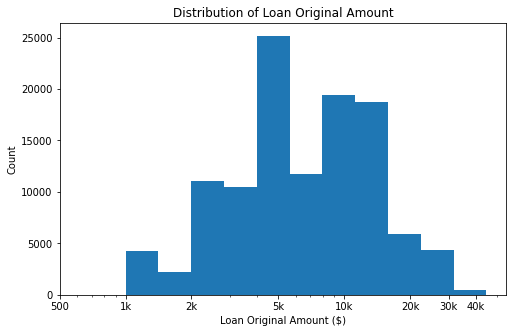

In [5]:
# plot the log transformed 
log_binsize = 0.15
bins = 10 ** np.arange(np.log10(df_loan_clean['LoanOriginalAmount'].min())-log_binsize, np.log10(df_loan_clean['LoanOriginalAmount'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loan_clean, x = 'LoanOriginalAmount', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4,3e4, 4e4], [500, '1k', '2k', '5k', '10k', '20k', '30k', '40k'])
plt.xlabel('Loan Original Amount ($)')
plt.ylabel('Count')
plt.title('Distribution of Loan Original Amount')
plt.show()

## Distribution of Stated Monthly Income

The monthly income the borrower stated at the time the listing was created. On the transformed scale, the Stated Monthly Income has a normal distribution which was expected due to general income distribution pattern where less number of individuals are expected at the peak and low point with high count around the average region.


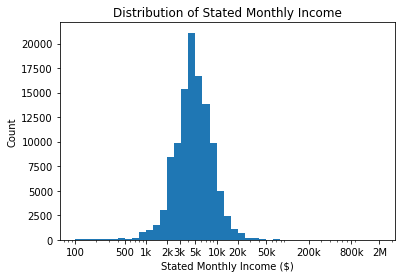

In [6]:
# log transformed plot for deeper investigation 
log_binsize = 0.1
bins = 10 ** np.arange(2, np.log10(df_loan_clean['StatedMonthlyIncome'].max())+log_binsize, log_binsize)


plt.hist(data = df_loan_clean, x = 'StatedMonthlyIncome', bins = bins)
plt.xscale('log')
plt.xticks([0.1e3,0.5e3, 1e3,2e3,3e3,5e3,10e3,20e3, 50e3, 200e3, 800e3, 2000e3], ['100','500' ,'1k','2k','3k','5k','10k', '20k', '50k', '200k', '800k', '2M'])
plt.xlabel('Stated Monthly Income ($)')
plt.ylabel('Count')
plt.title('Distribution of Stated Monthly Income')
plt.show()

## Listing category distribution 
The Listing category is the category of the listing that the borrower selected when posting their listing. Majority of the loans where given for Debt Consolidation. Borrowers were taking the loan to pay off other loans.
 

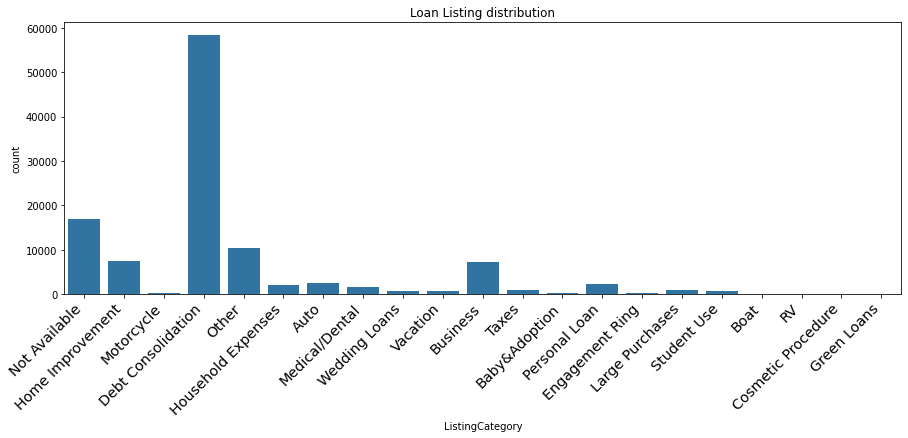

In [7]:
plt.figure(figsize=[15, 5])
default_color = sb.color_palette()[0]
sb.countplot(data = df_loan_clean, x = 'ListingCategory', color = default_color)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.title("Loan Listing distribution")
plt.show()

## Loan Original Amount  and Monthly Loan Payment distribution in respect to Employment Status
There is an interesting pattern in regards to the loan original amount and the monthly loan payment for a borrower based on their employment status. There are more higher loan amount given to employeed borrower. The monthly loan payment amount is almost same for self-employed and employed borrowers but the mean is higher for employed showing possible reason for the higher loan amount given to employed borrowers.
 

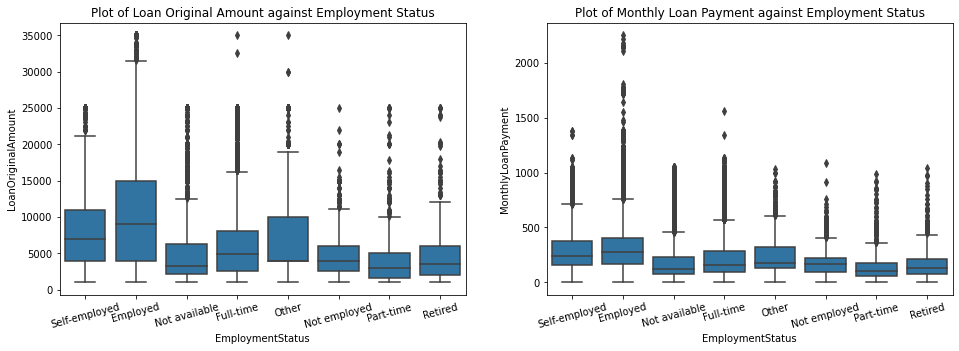

In [8]:
plt.figure(figsize = [16, 5])
base_color = sb.color_palette()[0]

# LEFT plot: Loan Original Amount
plt.subplot(1, 2, 1)
ax1 = sb.boxplot(data=df_loan_clean, x='EmploymentStatus', y='LoanOriginalAmount', color=base_color)
plt.xticks(rotation=15)
plt.title("Plot of Loan Original Amount against Employment Status");

# RIGHT plot: Monthly Loan Payment
plt.subplot(1, 2, 2)
sb.boxplot(data=df_loan_clean, x='EmploymentStatus', y='MonthlyLoanPayment', color=base_color)
plt.xticks(rotation=15)
plt.title("Plot of Monthly Loan Payment against Employment Status");

## Borrower APR across Prosper rating and Income Range
Borrower APR is the Borrower's Annual Percentage Rate (APR) for the loan. Across all income range the propser rating tends to increase with lower Borrower's Annual Percentage Rate (APR) for the loan. So there seems to be a great impact on the Prosper Loan rating from the Borrower APR and Income range.
 

In [9]:
# convert ordinal columns into ordered categorical types
ordinal_var_dict = {
    'ProsperRating (Alpha)': ['HR','E','D','C','B', 'A','AA'],
    'IncomeRange': ['Not displayed','Not employed', '$0','$1-24,999','$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+',]
                   }

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df_loan_clean[var] = df_loan_clean[var].astype(ordered_var)

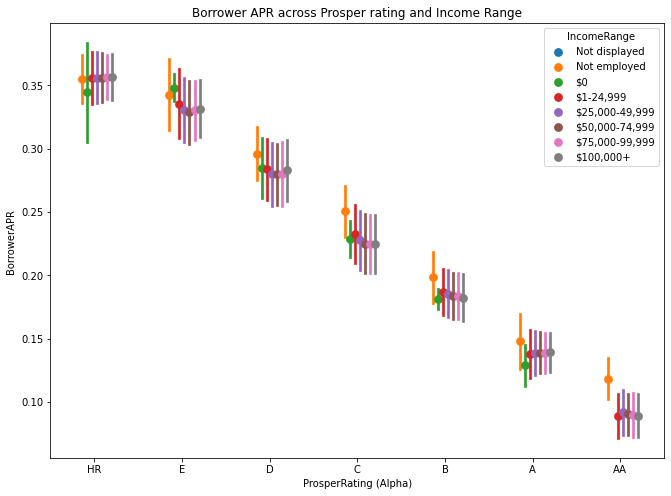

In [10]:
plt.figure(figsize=[ 11, 8])
graph = sb.pointplot(data = df_loan_clean, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'IncomeRange', prop=font_pro, linestyles = '', dodge = 0.4, ci='sd')
plt.title('Borrower APR across Prosper rating and Income Range')
plt.ylabel('BorrowerAPR ')
graph.set_yticklabels([],minor = True);

In [12]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 282302 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\ProgramData\Anaconda3\lib\site-packages\jupyter_core\application.py", line 268, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 340, in start
    self.convert_notebooks()
  File "C:\ProgramData\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 510, in convert_notebooks
    self.convert_single_notebook(notebook_